In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Formulas have been taken from lecture slides.

LDA:

1. Calculate the assumed common covariance matrix
2. Calculate the means for each of the two classes
3. Plug into the formula $f_{kl}(x)=wx+b$, when $f(x) < 0$, predicted class: $l$, else predicted class: $k$
   1. $w=(\mu_k-\mu_l)^T\Sigma^{-1}$
   2. $b=-\frac{1}{2}(\mu_k\mu_l)^T\Sigma^{-1}(\mu_k+\mu_l)+log\frac{N_k}{N_l}$

QDA:

1. Calculate the covariance matrix for each of the two classes
2. Calculate the means for each of the two classes
3. Plug into the formula $f_{21}(x)=\frac{1}{2}\log\frac{|\Sigma_1|}{|\Sigma_2|}+x^T(\Sigma_2^{-1}\mu_2-\Sigma_1^{-1}\mu_1)-\frac{1}{2}x^T(\Sigma_2^{-1}-\Sigma_1^{-1})x-\frac{1}{2}\mu_2^T\Sigma_2^{-1}\mu_2+\frac{1}{2}\mu_1^T\Sigma_1^{-1}\mu_1+\log\frac{N_2}{N_1}$ when the f(x) > 0 assign class 2, else assign class 1

NB:

1.


In [246]:
class LDA:
    def __init__(self):
        self.w=0
        self.b=0
        self.mean_0=0
        self.mean_1=0
        self.covariance_matrix=0

    def fit(self,X,y):
        classes= np.unique(y)
        self.covariance_matrix = np.cov(X[y==classes[0]].T)
        self.mean_0=np.mean(X[y==classes[0]], axis=0)
        self.mean_1=np.mean(X[y==classes[1]], axis=0)

        covariance_matrix_inverse = np.linalg.inv(self.covariance_matrix)
        no_0 = (y==classes[0]).sum()
        no_1=(y==classes[1]).sum()
        # class 0 being class k, and class 1 being class l
        self.w=(self.mean_0-self.mean_1).T.dot(covariance_matrix_inverse)
        self.b=-(1/2)*(self.mean_0-self.mean_1).T.dot(covariance_matrix_inverse).dot((self.mean_0+self.mean_1))+np.log(no_0/no_1)

        
    def predict_proba(self, Xtest):
        f = self.w.dot(Xtest)+self.b
        # print("Predicted: ",f)
        return -f
    def predict(self, Xtest):
        f = np.sign(self.w.dot(Xtest)+self.b)
        # print("Predicted class: ",1 if f==-1 else 0)
        return 1 if f==-1 else 0
    def get_params(self):
        print("w: ",self.w ,"\nb: ",self.b, "\nm_0: ",self.mean_0, "\nm_1: ",self.mean_1,"\ncovariance matrix: ",self.covariance_matrix)
        return (self.w, self.b,self.mean_0,self.mean_1,self.covariance_matrix)
    
class QDA:
    def __init__(self):
        self.mean_0=0
        self.mean_1=0
        self.covariance_matrix_0=0
        self.covariance_matrix_1=0
        self.covariance_matrix_inverse_0 = 0
        self.covariance_matrix_inverse_1 = 0
        self.no_0 = 0
        self.no_1 = 0

    def fit(self,X,y):
        classes= np.unique(y)
        self.covariance_matrix_0 = np.cov(X[y==classes[0]].T)
   
        self.covariance_matrix_1 = np.cov(X[y==classes[1]].T)
        self.mean_0=np.mean(X[y==classes[0]], axis=0)
        self.mean_1=np.mean(X[y==classes[1]], axis=0)
        self.covariance_matrix_inverse_0 = np.linalg.inv(self.covariance_matrix_0)
        self.covariance_matrix_inverse_1 = np.linalg.inv(self.covariance_matrix_1)

        self.no_0 = (y==classes[0]).sum()
        self.no_1=(y==classes[1]).sum()

    def compute(self,Xtest):
        return 1/2*(np.log(np.linalg.det(self.covariance_matrix_0)/np.linalg.det(self.covariance_matrix_1)))+Xtest.T.dot(self.covariance_matrix_inverse_1.dot(self.mean_1)-self.covariance_matrix_inverse_0.dot(self.mean_0))-1/2*Xtest.T.dot(self.covariance_matrix_inverse_1-self.covariance_matrix_inverse_0).dot(Xtest)-1/2*(self.mean_1.T.dot(self.covariance_matrix_inverse_1).dot(self.mean_1))+1/2*self.mean_0.T.dot(self.covariance_matrix_inverse_0).dot(self.mean_0)+np.log(self.no_1/self.no_0)
    def predict_proba(self,Xtest):
        f = self.compute(Xtest)
        return f
    def predict(self,Xtest):
        f = self.compute(Xtest)
        return 1 if f>0 else 0

    def get_params(self):
        print("\nm_0: ",self.mean_0, "\nm_1: ",self.mean_1,"\ncov_0: ",self.covariance_matrix_0,"\ncov_1: ",self.covariance_matrix_1,"\ncov_0 inverse: ",self.covariance_matrix_inverse_0,"\ncov_1 inverse: ",self.covariance_matrix_inverse_1)
        return (self.mean_0, self.mean_1,self.covariance_matrix_0,self.covariance_matrix_1,self.covariance_matrix_inverse_0,self.covariance_matrix_inverse_1)
    

class NB:
    def fit(X,y):
        return NotImplementedError
    def predict_proba(Xtest):
        return NotImplementedError
    def predict(Xtest):
        return NotImplementedError
    def get_params():
        return NotImplementedError
    



In [240]:
qda=QDA()
(X,y)=scheme_1_data_generator(2)
qda.fit(X,y)
qda.predict_proba(X[0])

[[2.02992775 0.91610809]
 [0.91610809 1.77267072]]


0.336663912835741

#### Data generation


In [65]:
def scheme_1_data_generator(a):
    n=1000
    bern_prob=0.5
    y=np.random.binomial(size=n, n=1, p= bern_prob)
    feature_0_0 = np.random.normal(0, 1, size=(1, n)).T
    feature_0_1 = np.random.normal(0, 1, size=(1, n)).T
    feature_0=np.hstack([feature_0_0,feature_0_1])

    feature_1_0 = np.random.normal(a, 1, size=(1, n)).T
    feature_1_1 = np.random.normal(a, 1, size=(1, n)).T
    feature_1=np.hstack([feature_1_0,feature_1_1])
    
    X = np.concatenate((feature_0[y==0],feature_1[y==1]))
    return (X,y)
def scheme_2_data_generator(mean,rho):
    n=1000
    bern_prob=0.5
    y=np.random.binomial(size=n, n=1, p= bern_prob)
    # cov(X,Y) = corr(X,Y)*std(X)*std(Y)
    features_0 = np.random.multivariate_normal([0,0], [[1,rho],[rho,1]], n)
    features_1 = np.random.multivariate_normal([mean,mean], [[1,-rho],[-rho,1]], n)
    X = np.concatenate((features_0[y==0],features_1[y==1]))
    return (X,y)


#### Accuracy


In [94]:
def get_accuracy(model:LDA|QDA|NB,X_test,y_test):
    correct=0
    index =0
    for x in X_test:
        result=model.predict(x)
        if result==y_test[index]:
            correct=correct + 1
        index = index + 1
    return correct/len(y_test)

### Comparison #1


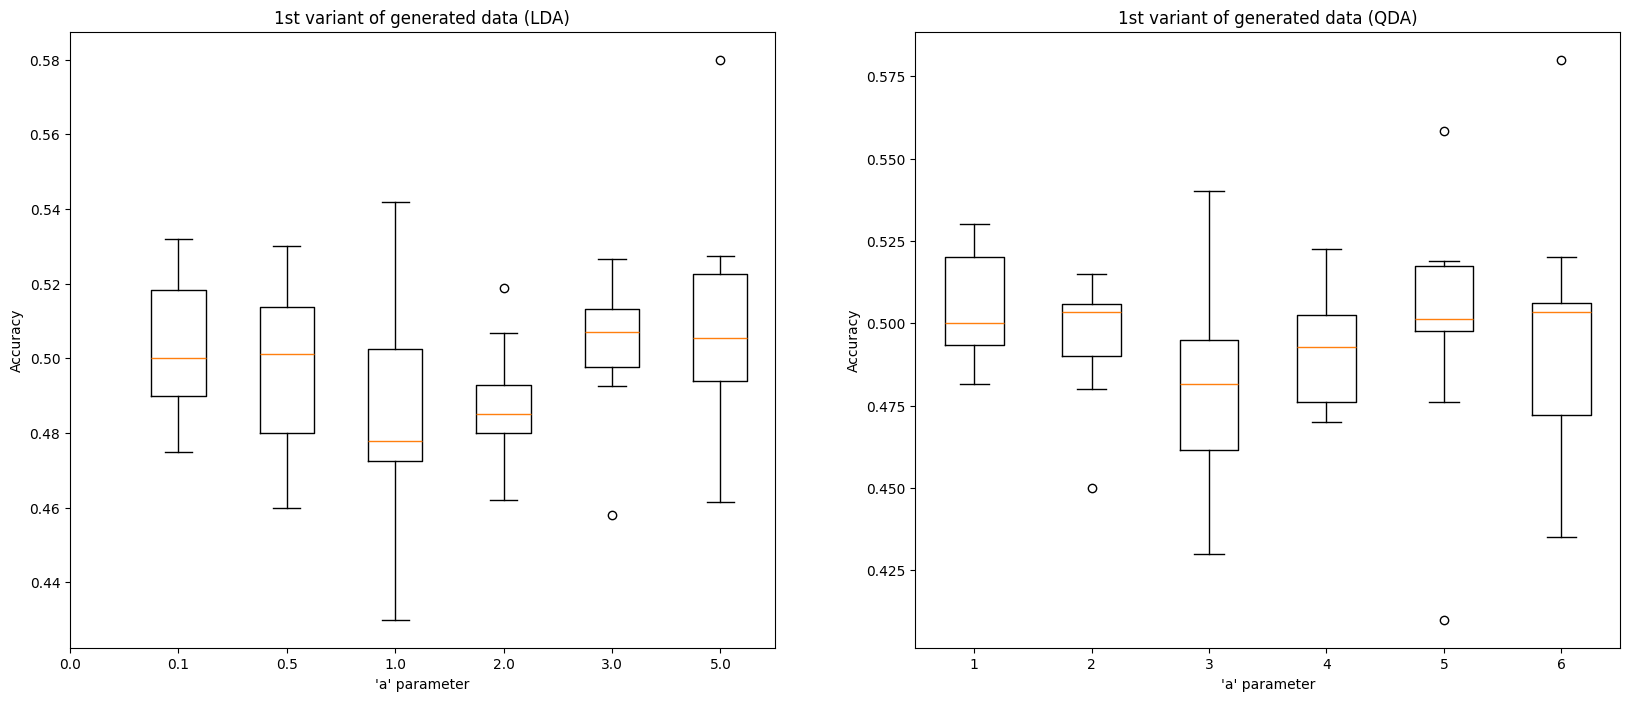

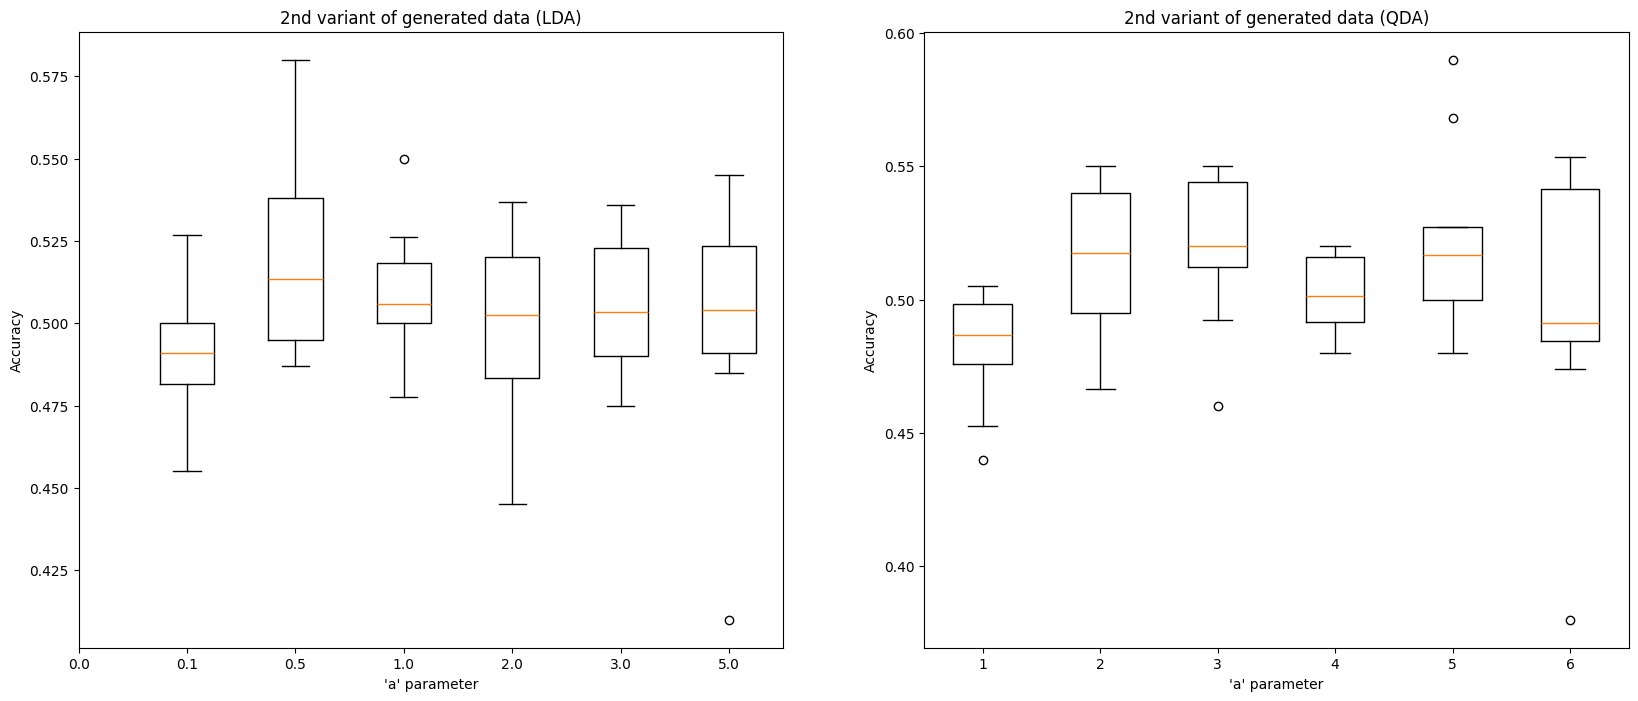

In [273]:
lda=LDA()
qda=QDA()
# scheme_2_data_generator(1,0.5)
splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
a_params = [0.1,0.5,1,2,3,5]
accuracies_scheme_1={'lda':[],'qda':[]}
accuracies_scheme_2={'lda':[],'qda':[]}


for a in a_params:
    accuracy_scheme_1={'lda':[],'qda':[]}
    accuracy_scheme_2={'lda':[],'qda':[]}

    for x in splits:

        (X,y)=scheme_1_data_generator(a)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
        lda.fit(X_train,y_train)
        
        accuracy_scheme_1['lda'].append(get_accuracy(lda,X_test,y_test))

        qda.fit(X_train,y_train)
        accuracy_scheme_1['qda'].append(get_accuracy(qda,X_test,y_test))


        (X,y)=scheme_2_data_generator(a,0.5)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
        lda.fit(X_train,y_train)
        accuracy_scheme_2['lda'].append(get_accuracy(lda,X_test,y_test))

        qda.fit(X_train,y_train)
        accuracy_scheme_2['qda'].append(get_accuracy(qda,X_test,y_test))

    accuracies_scheme_1['lda'].append(accuracy_scheme_1['lda'])
    accuracies_scheme_2['lda'].append(accuracy_scheme_2['lda'])

    accuracies_scheme_1['qda'].append(accuracy_scheme_1['qda'])
    accuracies_scheme_2['qda'].append(accuracy_scheme_2['qda'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(accuracies_scheme_1['lda'])
ax1.set_xticks(list(range(len(a_params)+1)),np.concatenate(([0],a_params)))
ax1.set_title("1st variant of generated data (LDA)")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("'a' parameter")

      
ax2.boxplot(accuracies_scheme_1['qda'])
ax1.set_xticks(list(range(len(a_params)+1)),np.concatenate(([0],a_params)))
ax2.set_title("1st variant of generated data (QDA)")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("'a' parameter")
plt.show()  


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(accuracies_scheme_2['lda'])
ax1.set_xticks(list(range(len(a_params)+1)),np.concatenate(([0],a_params)))
ax1.set_title("2nd variant of generated data (LDA)")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("'a' parameter")

      
ax2.boxplot(accuracies_scheme_2['qda'])
ax1.set_xticks(list(range(len(a_params)+1)),np.concatenate(([0],a_params)))
ax2.set_title("2nd variant of generated data (QDA)")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("'a' parameter")
plt.show()  


#### Comparison #2


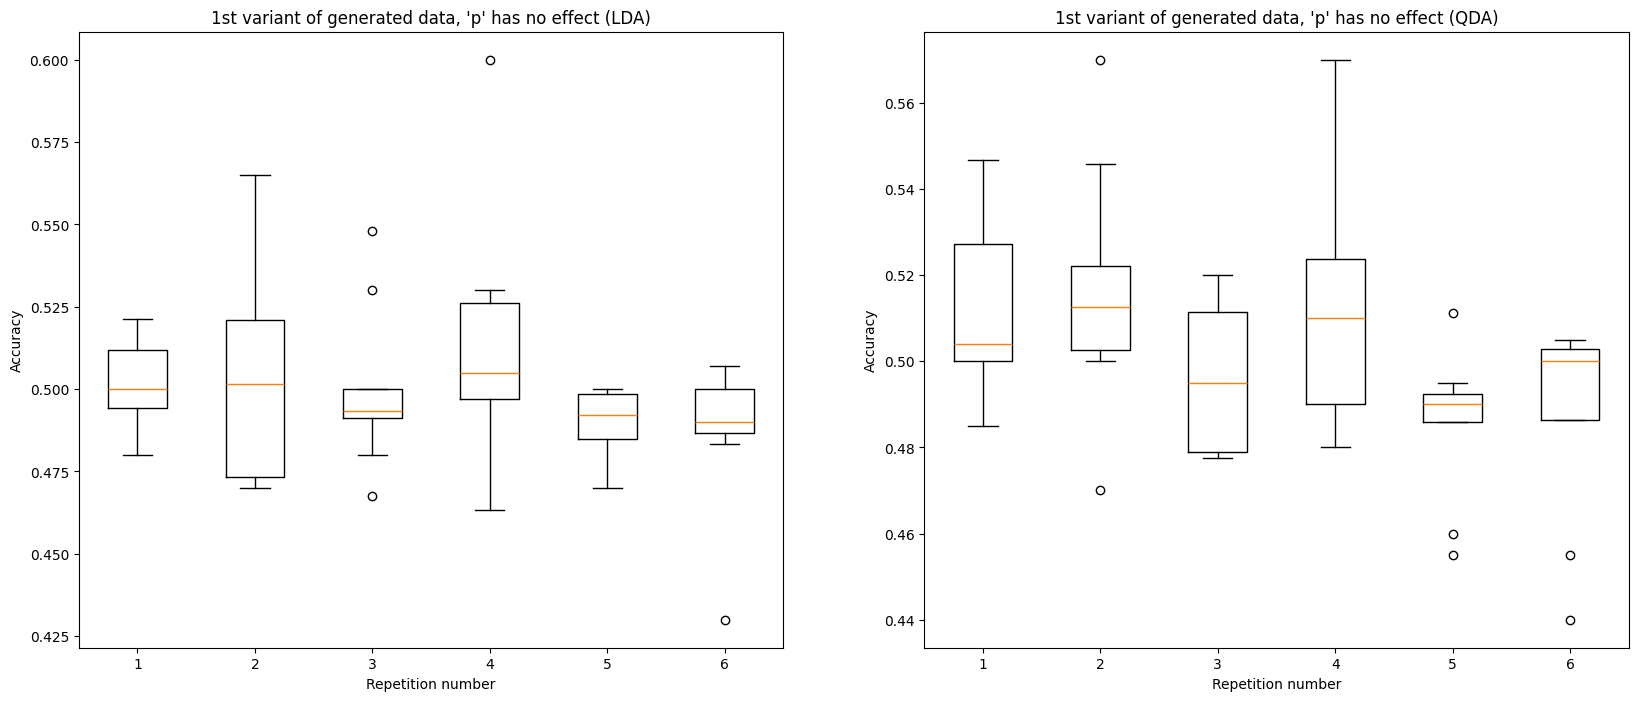

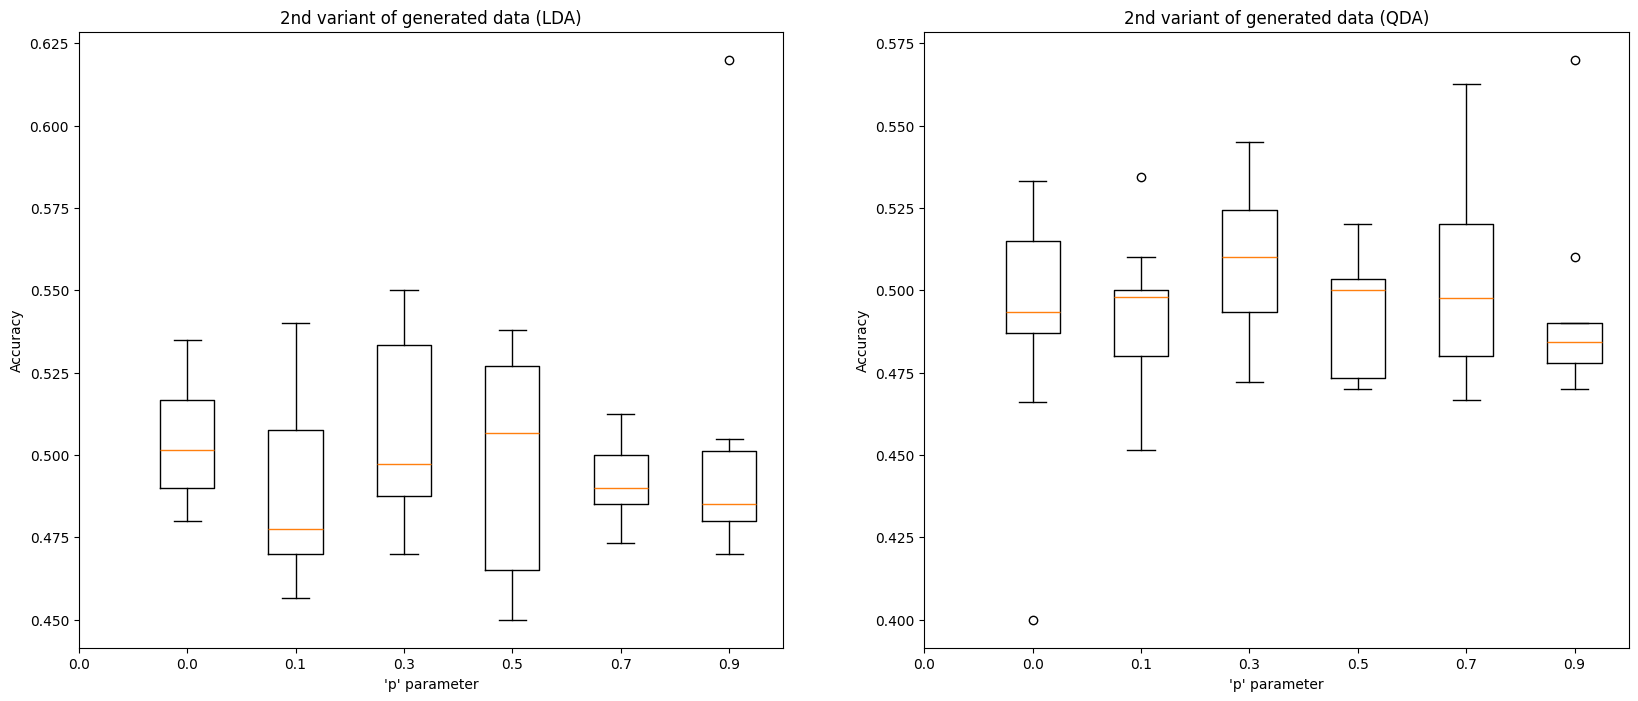

In [277]:
lda=LDA()
qda = QDA()
splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
p_params = [0,0.1,0.3,0.5,0.7,0.9]
accuracies_scheme_1={'lda':[],'qda':[]}
accuracies_scheme_2={'lda':[],'qda':[]}
for p in p_params:
    accuracy_scheme_1={'lda':[],'qda':[]}
    accuracy_scheme_2={'lda':[],'qda':[]}
    for x in splits:
        (X,y)=scheme_1_data_generator(2)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
        lda.fit(X_train,y_train)
        accuracy_scheme_1['lda'].append(get_accuracy(lda,X_test,y_test))

        qda.fit(X_train,y_train)
        accuracy_scheme_1['qda'].append(get_accuracy(qda,X_test,y_test))


        (X,y)=scheme_2_data_generator(2,p)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
        lda.fit(X_train,y_train)
        accuracy_scheme_2['lda'].append(get_accuracy(lda,X_test,y_test))

        qda.fit(X_train,y_train)
        accuracy_scheme_2['qda'].append(get_accuracy(qda,X_test,y_test))

    accuracies_scheme_1['lda'].append(accuracy_scheme_1['lda'])
    accuracies_scheme_2['lda'].append(accuracy_scheme_2['lda'])

    accuracies_scheme_1['qda'].append(accuracy_scheme_1['qda'])
    accuracies_scheme_2['qda'].append(accuracy_scheme_2['qda'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(accuracies_scheme_1['lda'])
ax1.set_title("1st variant of generated data, 'p' has no effect (LDA)")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Repetition number")

      
ax2.boxplot(accuracies_scheme_1['qda'])
ax2.set_title("1st variant of generated data, 'p' has no effect (QDA)")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Repetition number")
plt.show()      


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.boxplot(accuracies_scheme_2['lda'])
ax1.set_xticks(list(range(len(p_params)+1)),np.concatenate(([0],p_params)))
ax1.set_title("2nd variant of generated data (LDA)")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("'p' parameter")

      
ax2.boxplot(accuracies_scheme_2['qda'])
ax2.set_xticks(list(range(len(p_params)+1)),np.concatenate(([0],p_params)))
ax2.set_title("2nd variant of generated data (QDA)")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("'p' parameter")
plt.show()    


#### Comparison #3


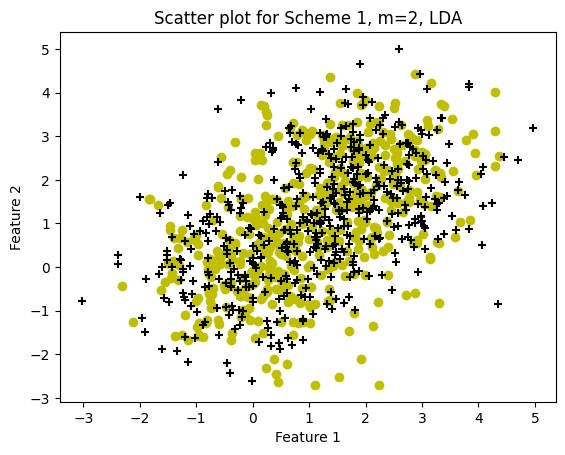

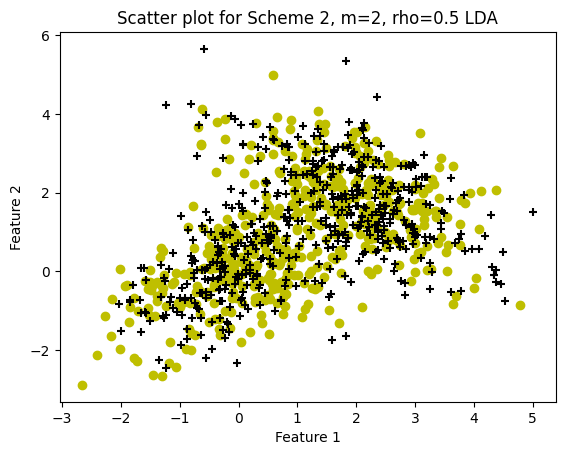

In [149]:
(X_1,y_1)=scheme_1_data_generator(2)
(X_2,y_2)=scheme_2_data_generator(2,0.5)

x_class_0 = np.where(y_1==0)
x_class_1 = np.where(y_1==1)

fig, ax = plt.subplots()
ax.scatter([row[0] for row in X_1[x_class_0]],[row[1] for row in X_1[x_class_0]], marker='o',c='y')
ax.scatter([row[0] for row in X_1[x_class_1]],[row[1] for row in X_1[x_class_1]], marker='+',c='k')
plt.title("Scatter plot for Scheme 1, m=2, LDA")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.show()

x_class_0 = np.where(y_2==0)
x_class_1 = np.where(y_2==1)

fig, ax = plt.subplots()
ax.scatter([row[0] for row in X_2[x_class_0]],[row[1] for row in X_2[x_class_0]], marker='o',c='y')
ax.scatter([row[0] for row in X_2[x_class_1]],[row[1] for row in X_2[x_class_1]], marker='+',c='k')
plt.title("Scatter plot for Scheme 2, m=2, rho=0.5 LDA")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.show()



In [157]:
from scipy.linalg import solve
lda.get_params()

w:  [0.04397403 0.09473729] 
b:  -0.07263690165997647 
m_0:  [0.83700656 0.96185684] 
m_1:  [0.68614144 0.709138  ] 
covariance matrix:  [[1.64239977 0.83010808]
 [0.83010808 2.2822655 ]]


(array([0.04397403, 0.09473729]),
 -0.07263690165997647,
 array([0.83700656, 0.96185684]),
 array([0.68614144, 0.709138  ]),
 array([[1.64239977, 0.83010808],
        [0.83010808, 2.2822655 ]]))

#### Real data comparison
